In [1]:
import IRF_Simulator as irfsim
import MC_PHD as mcphd

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
phd, phd_times = mcphd.MCPHD(uaBulk=0.04, 
                            usBulk=10, 
                            g=0.9, 
                            n=1.4, 
                            sdSep=0, 
                            slabThickness=40, 
                            detRad=3, 
                            isRefl=False, 
                            maxTime=2.5e-9, 
                            nPhotons=1e9, 
                            nTimeBins=4096)

[[0, 0, 1, 1], [0.04, 10, 0.9, 1.4]]
nphoton: 1e+09
tstart: 0
tstep: 2.5e-09
tend: 2.5e-09
issrcfrom0: 1


In [24]:
irf, irf_times = irfsim.generate_instrument_function_multi_peak(
    photon_count=2000000,   
    time_range_ns=25,
    time_resolution_ps=6.1,
    peak_widths_ps=[350.0, 550, 700.0, 2500],
    jitter_std_dev_ps=30.0,
    detector_response_type="gaussian",
    detector_response_params={'fwhm_ps': 40.0},
    peak_delays_ps=[5000, 5200, 5800, 6000],
    peak_ratios=[1.0, 0.6, 0.3, 1],
    avg_noise_floor=200,
    sd_noise_floor=20
)

irf = irf - np.min(irf)
irf = irf / np.sum(irf)

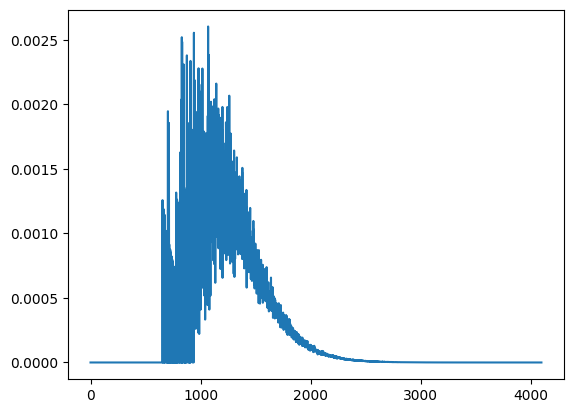

In [25]:
plt.plot(phd[0])

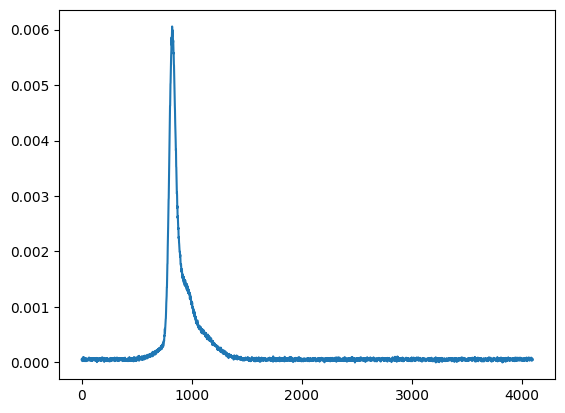

In [26]:
plt.plot(irf)

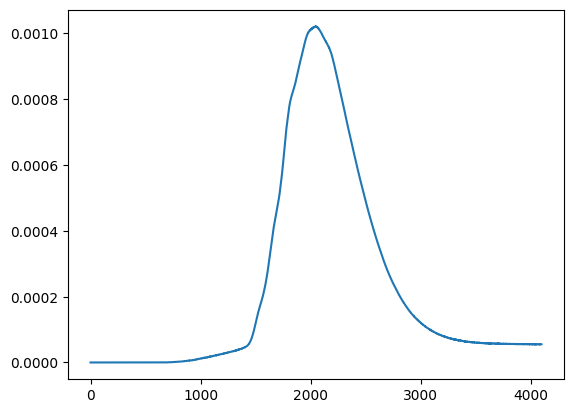

In [27]:
import scipy.signal as sig
datapoint = sig.convolve(phd[0], irf, mode='full')[:len(phd[0])]
plt.plot(datapoint)

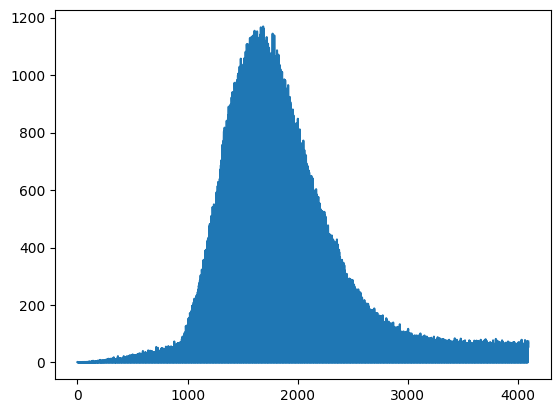

In [38]:
num_photons = 1000000
back_cte = 1e-12

datapoint = datapoint + back_cte
datapoint[datapoint < 0] = 0
probabilities = datapoint / np.sum(datapoint)

# Generate random times of flight based on the distribution
bins = np.arange(len(datapoint))
simulated_arrival_times = np.random.choice(bins, size=num_photons, p=probabilities)

simulated_phd = np.histogram(simulated_arrival_times, bins=int(len(bins)))[0]

plt.plot(simulated_phd)